In [ ]:
#############################################
# 1) MOUNT GOOGLE DRIVE
#############################################
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#############################################
# 2) IMPORT LIBRARIES
#############################################
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#############################################
# 3) SET PARAMETERS AND PATHS
#############################################
# กำหนดโฟลเดอร์สำหรับข้อมูลฝึกและตรวจสอบ (validation)
train_dir = '/content/drive/MyDrive/cloudDataset/train'
val_dir   = '/content/drive/MyDrive/cloudDataset/validation'

img_height = 150
img_width  = 150
batch_size = 32
epochs = 10  # ปรับเพิ่มได้ตามความเหมาะสม

In [ ]:
#############################################
# 4) CREATE IMAGE DATA GENERATORS
#############################################
# สำหรับชุดข้อมูลฝึก: มี Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# สำหรับชุดข้อมูล validation: เพียง rescale เท่านั้น
val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # เนื่องจากเป็น Binary Classification: Cloud vs Not Cloud
)

val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2476 images belonging to 2 classes.
Found 1857 images belonging to 2 classes.


In [ ]:
#############################################
# 5) BUILD CNN MODEL
#############################################
model = Sequential([
    # Conv + Pool ชุดที่ 1
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2,2)),

    # Conv + Pool ชุดที่ 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Conv + Pool ชุดที่ 3
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output: 1 neuron สำหรับ binary classification (Cloud=1, Not Cloud=0)
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#############################################
# 6) TRAIN MODEL
#############################################
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 817s 11s/step - accuracy: 0.6413 - loss: 0.4964 - val_accuracy: 0.9160 - val_loss: 0.1763
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9419 - loss: 0.1745 - val_accuracy: 0.9634 - val_loss: 0.0969
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9575 - loss: 0.1484 - val_accuracy: 0.9445 - val_loss: 0.1312
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9616 - loss: 0.1202 - val_accuracy: 0.9677 - val_loss: 0.0812
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9661 - loss: 0.1181 - val_accuracy: 0.9709 - val_loss: 0.0827
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9678 - loss: 0.1116 - val_accuracy: 0.9639 - val_loss: 0.0949
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9699 - loss: 0.0984 - val_accuracy: 0.9537 - val_loss: 0.1209
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9665 - loss: 0.0986 - val_accuracy: 0.9688 - 

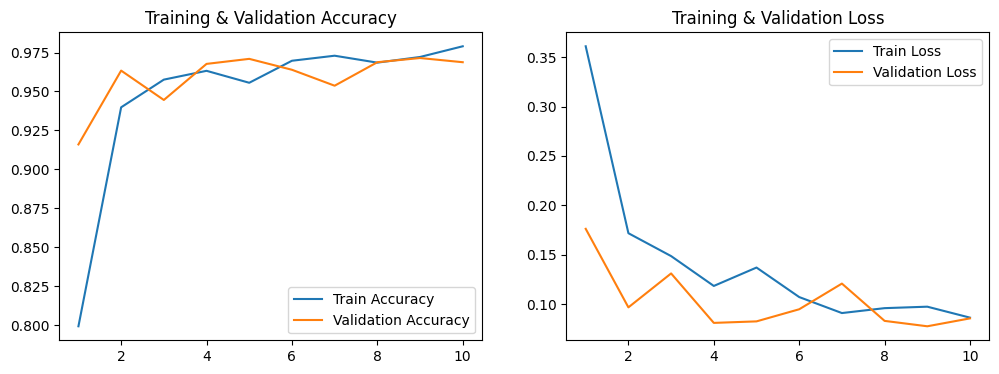

In [ ]:
#############################################
# 7) PLOT TRAINING & VALIDATION METRICS
#############################################
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

In [36]:
#############################################
# 8) FUNCTION TO PREDICT NEW IMAGE
#############################################
def predict_cloud(model, img_path):
    """
    ทำนายว่ารูปภาพเป็นก้อนเมฆ (Cloud) หรือไม่ (Not Cloud)
    :param model: โมเดลที่เทรนแล้ว
    :param img_path: path ของรูปภาพ
    :return: (label, confidence)
    """
    import cv2
    img = cv2.imread(img_path)
    if img is None:
        print("ไม่พบรูปภาพที่ระบุ:", img_path)
        return None, None

    # Resize & Normalize
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # เพิ่มมิติ batch

    # ทำนาย: ได้ค่าระหว่าง 0 ถึง 1
    pred = model.predict(img)[0][0]

    # เพิ่ม print เพื่อดูค่า pred
    print("ค่า pred:", pred)

    # ปรับ threshold จาก 0.5 เป็น 0.45
    label = "Cloud" if pred >= 0.45 else "Not Cloud"
    confidence = float(pred)
    return label, confidence



In [37]:
#############################################
# 9) TEST ON A NEW IMAGE
#############################################
# ระบุ path ของรูปทดสอบ (ปรับให้ตรงกับที่เก็บใน Google Drive ของคุณ)
test_image_path = '/content/drive/MyDrive/cloudDataset/validation/cloud/images2.jpg'
label, conf = predict_cloud(model, test_image_path)
if label:
    print(f"ผลลัพธ์: {label}, Confidence: {conf:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
ค่า pred: 0.00080305565
ผลลัพธ์: Not Cloud, Confidence: 0.0008


In [39]:
#############################################
# 10) SAVE MODEL (OPTIONAL)
#############################################
model.save('/content/drive/MyDrive/data_cloud/cloud_model.keras')